## Probabilistic Approach

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

In [4]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

<Figure size 1500x500 with 0 Axes>

### Dataset

In [6]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [7]:
type(X)

numpy.ndarray

In [8]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(X, columns=cols)

In [9]:
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


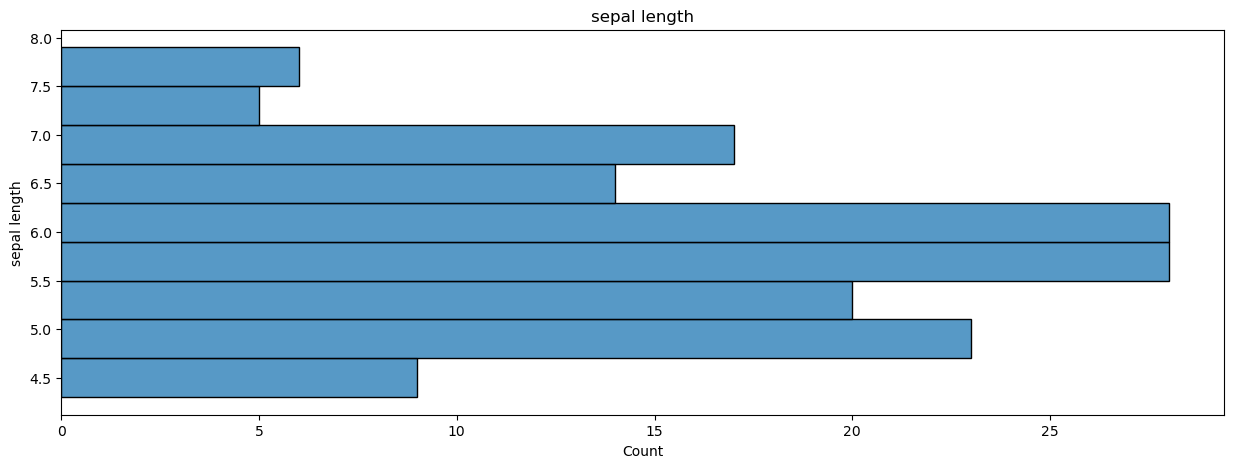

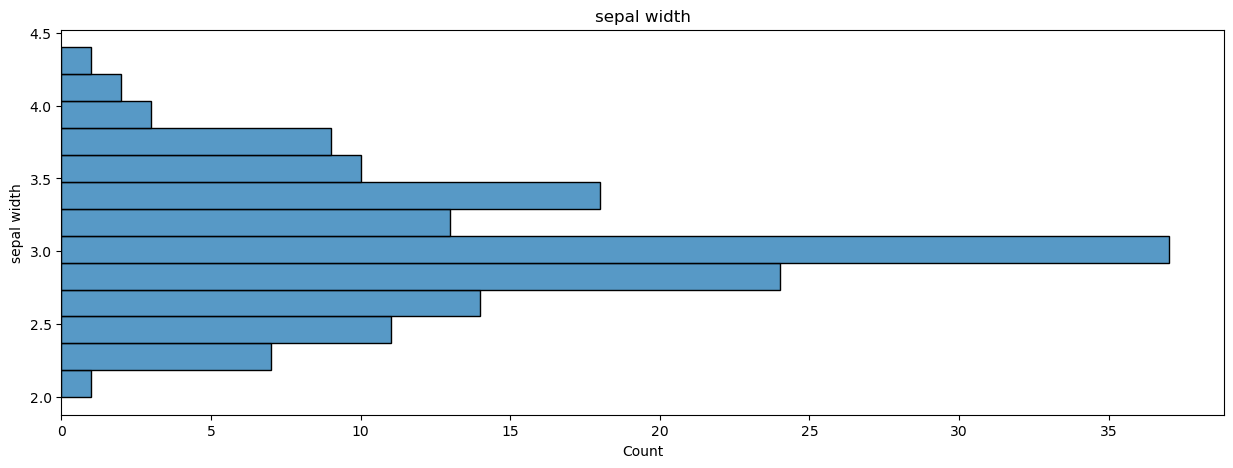

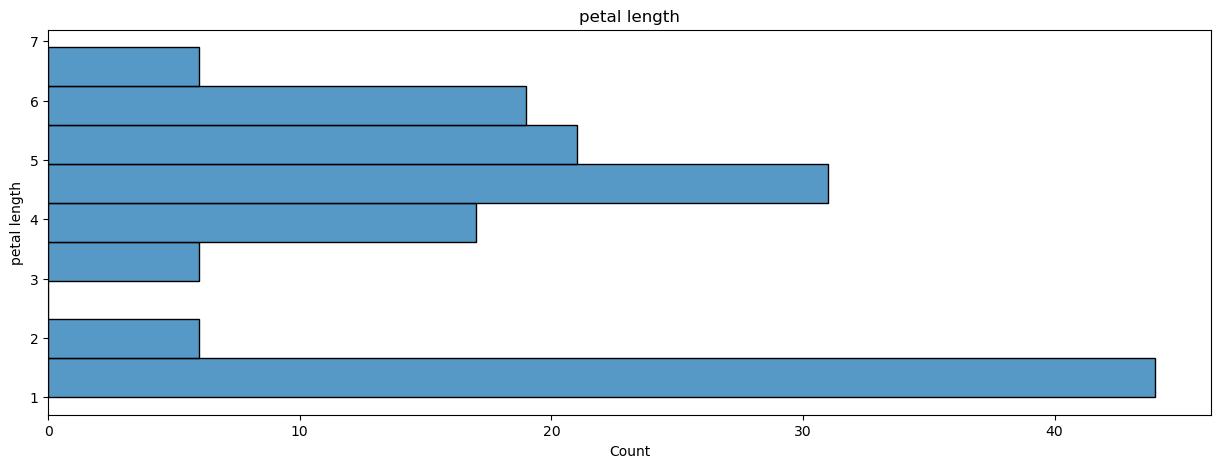

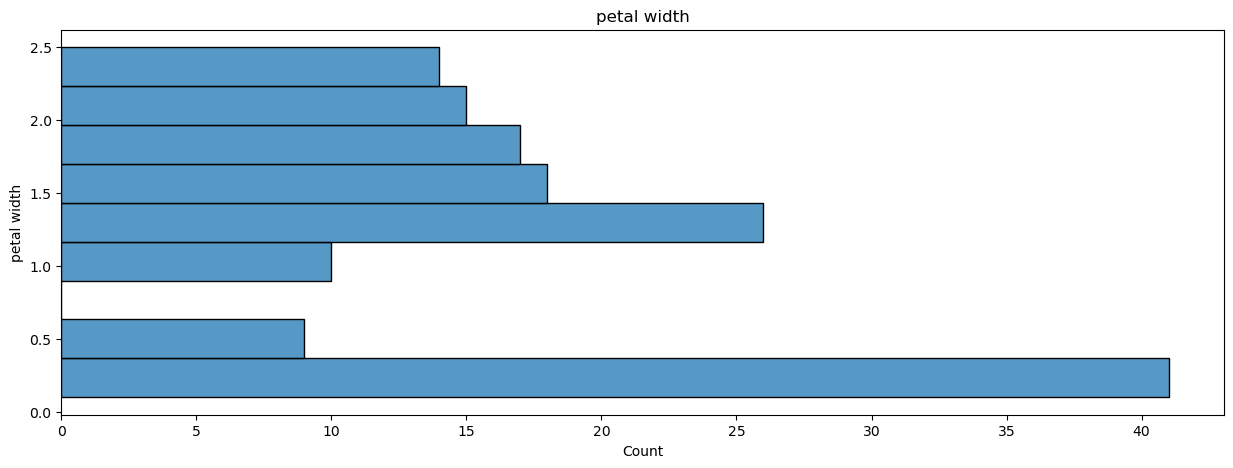

In [10]:
for col in cols:
    fig, ax = plt.subplots()
    colcount = iris_df[col].value_counts()
    ax.set_title(col)
    sns.histplot(data=iris_df,y=col, ax=ax)

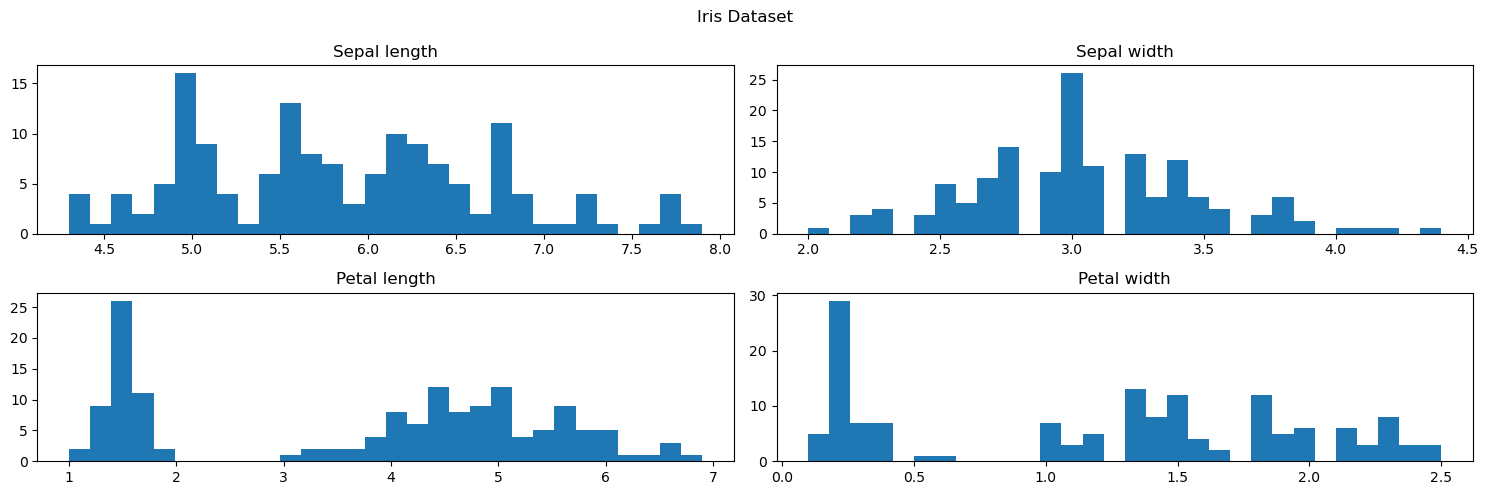

In [11]:
fig = plt.figure()

fig.suptitle('Iris Dataset')

for count, col in enumerate(iris_df.columns):
    ax = fig.add_subplot(2,2, count+1)
    n, bins, patch = ax.hist(iris_df[col], bins=30)
    ax.set_title(col.capitalize())

plt.tight_layout()

## Gaussian Distribution

In [13]:
# Mean, std

def fn_mu_std(df):
    
    mu, std, min, max = {}, {}, {}, {}
    
    for col in df.columns:
        mu[col] = df[col].mean()
        std[col] = df[col].std()
        min[col] = df[col].min()
        max[col] = df[col].max()
        
    return mu, std, min, max

In [41]:
label_names={0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}

sepal length-Mean:5.006;Std:0.3524896872134512;Val:5.9,PDF:0.04538959059205922
sepal width-Mean:3.428;Std:0.3790643690962886;Val:3.0,PDF:0.5563720880377253
petal length-Mean:1.4620000000000002;Std:0.1736639964801841;Val:5.1,PDF:1.1705571753503115e-95
petal width-Mean:0.24599999999999997;Std:0.10538558938004569;Val:1.8,PDF:2.2994205049331695e-47
sepal length-Mean:5.936;Std:0.5161711470638635;Val:5.9,PDF:0.7710101202357019
sepal width-Mean:2.7700000000000005;Std:0.3137983233784114;Val:3.0,PDF:0.9718584132539116
petal length-Mean:4.26;Std:0.46991097723995806;Val:5.1,PDF:0.1717982477055383
petal width-Mean:1.3259999999999998;Std:0.197752680004544;Val:1.8,PDF:0.11408115120771103
sepal length-Mean:6.587999999999998;Std:0.635879593274432;Val:5.9,PDF:0.3494071131564313
sepal width-Mean:2.974;Std:0.3224966381726376;Val:3.0,PDF:1.2330295149586668
petal length-Mean:5.5520000000000005;Std:0.5518946956639835;Val:5.1,PDF:0.5168935071010351
petal width-Mean:2.0260000000000002;Std:0.27465005563666733;

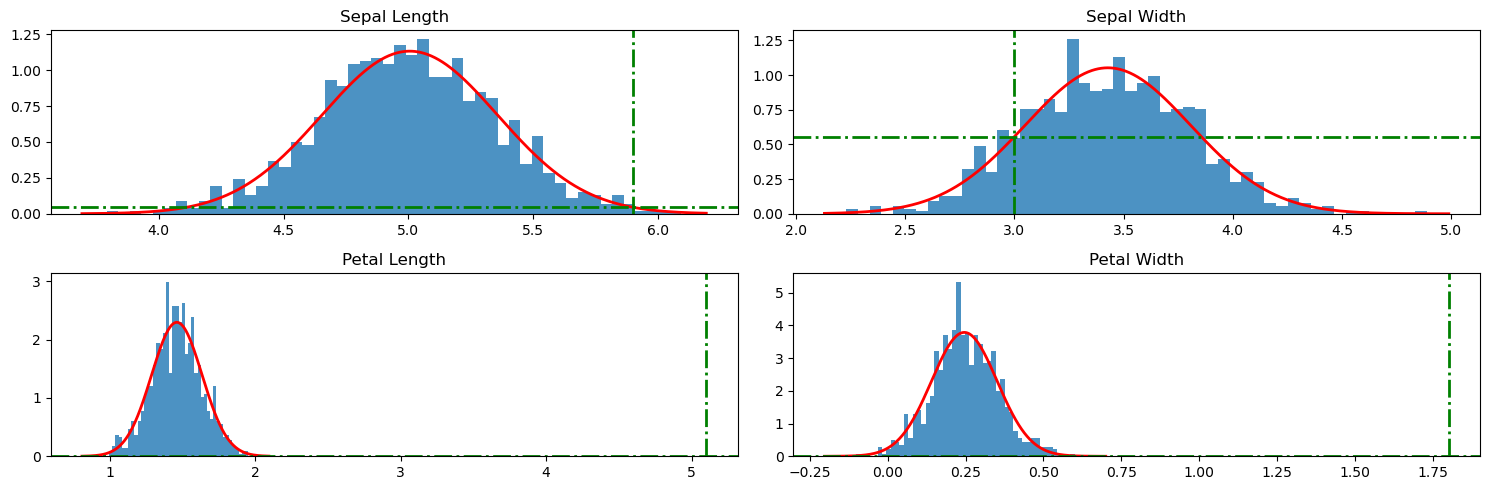

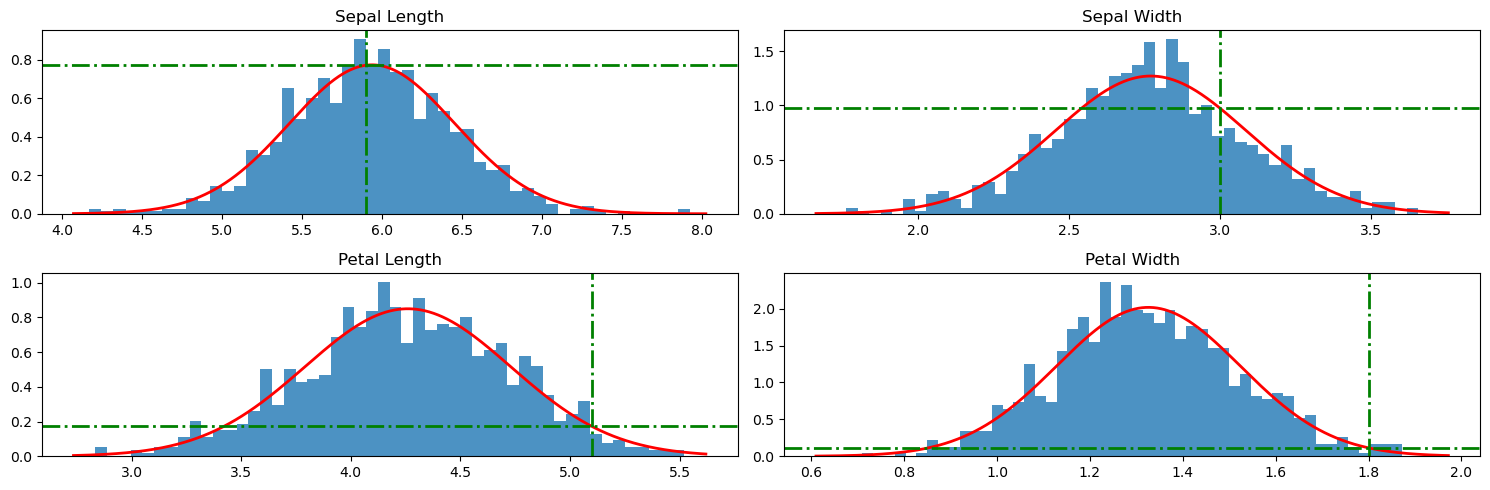

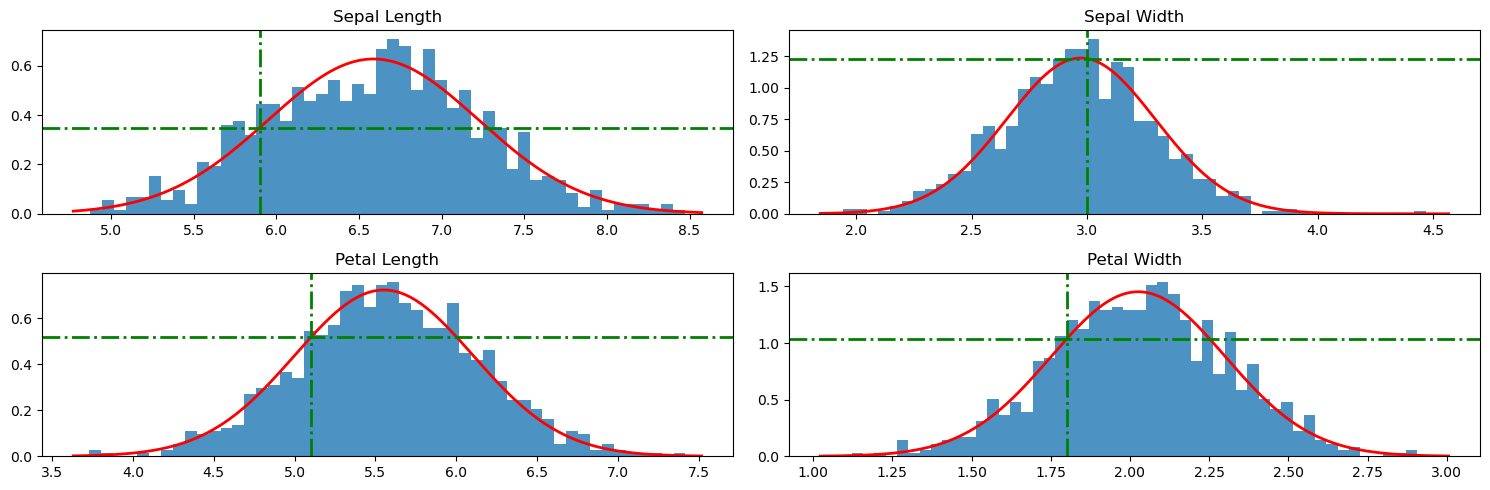

In [43]:
pdf_label = {}

for lbl in [0,1,2]:
    tmp_df = iris_df[y==lbl]
    mu, std_dev, min_val, max_val = fn_mu_std(tmp_df)
    
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    nSample=1000
    pdf_col = {}
    
    for count, col in enumerate(tmp_df.columns):
        ax= axes[count]
        meanVal = mu[col]
        stdDev = std_dev[col]
        minVal = min_val[col]
        maxVal = max_val[col]
        data = np.random.normal(meanVal, stdDev, nSample)
        ax.hist(data, bins=50, density=True,alpha=0.8)
        # ax.hist(iris_df[col], bins=50, alpha=0.4)
        x = np.linspace(data.min()-0.1, data.max()+0.1, nSample)
        pdf = norm.pdf(x, meanVal, stdDev)
        ax.plot(x, pdf, 'r-', lw=2)
        ax.set_title(col.title())
        val=iris_df.iloc[-1][col]
        pdf_val=norm.pdf(val,meanVal,stdDev)  #given a values what is its probability
        pdf_col[col]=pdf_val

        ax.axvline(x=val,color='g',linestyle='-.',linewidth=2)
        ax.axhline(y=pdf_val,color='g',linestyle='-.',linewidth=2)
        print(f'{col}-Mean:{meanVal};Std:{stdDev};Val:{val},PDF:{pdf_val}')
        
    pdf_label[label_names[lbl]]=pdf_col    
    plt.tight_layout()

In [45]:
pdf_label

{'setosa': {'sepal length': 0.04538959059205922,
  'sepal width': 0.5563720880377253,
  'petal length': 1.1705571753503115e-95,
  'petal width': 2.2994205049331695e-47},
 'versicolor': {'sepal length': 0.7710101202357019,
  'sepal width': 0.9718584132539116,
  'petal length': 0.1717982477055383,
  'petal width': 0.11408115120771103},
 'virginica': {'sepal length': 0.3494071131564313,
  'sepal width': 1.2330295149586668,
  'petal length': 0.5168935071010351,
  'petal width': 1.0353767122893802}}

In [49]:
pdf_label['setosa']['sepal length']*pdf_label['setosa']['sepal width']*pdf_label['setosa']['petal length']*pdf_label['setosa']['petal width']

6.797240416375131e-144

In [55]:
#or do it in a loop
y_pred=[]

for k, val_lbl in pdf_label.items():
    prob=1

    for k_col, val_col in val_lbl.items():
        prob *=val_col
    y_pred.append(prob)


    print(f'For label:{k:15s}; likelhood: {prob: 0.4f}')


y_pred=[v/sum(y_pred) for v in y_pred]

print('Probabilities',y_pred)

For label:setosa         ; likelhood:  0.0000
For label:versicolor     ; likelhood:  0.0147
For label:virginica      ; likelhood:  0.2306
Probabilities [2.77147960543323e-143, 0.059879030237636674, 0.9401209697623634]


In [85]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
clf = GaussianNB() #Instantiation

clf.fit(iris_df, y) # fit the model
y_pred = clf.predict(iris_df) #predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
xplot=iris_df.keys()[0]
yplot=iris_df.keys()[2]

x_err=iris_df[xplot][(y!=y_pred)]
y_err=iris_df[yplot][(y!=y_pred)]

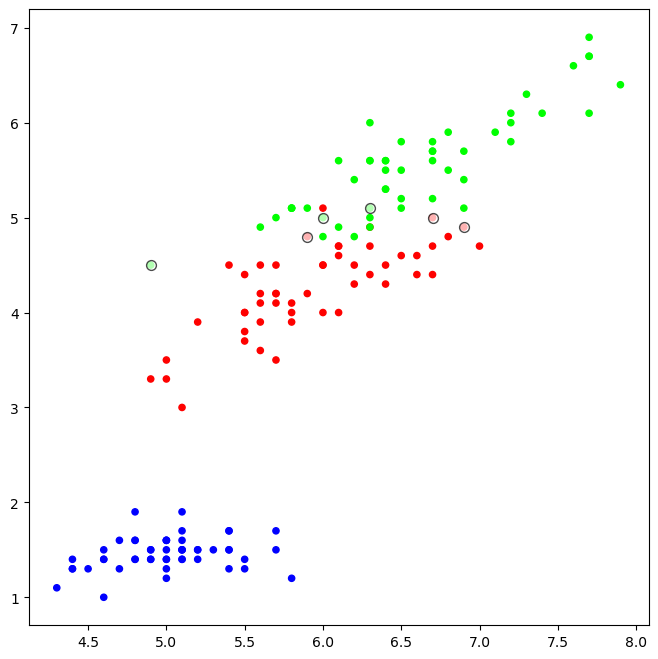

In [91]:
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111)
plt.scatter(iris_df[xplot], iris_df[yplot], s = 20, c = y , cmap = plt.cm.brg)
plt.scatter(x_err,y_err , s = 50, c = 'w' ,edgecolors='black',alpha=0.7);

In [93]:
x_err.shape

(6,)

In [73]:
(150-6)/150

0.96

In [96]:
clf = MultinomialNB(alpha=0.1) #Instantiation

clf.fit(iris_df, y) # fit the model
y_pred = clf.predict(iris_df) #predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9533333333333334

In [123]:
X,y=datasets.make_moons(n_samples=1000,shuffle=True,noise=0.1,random_state=RANDOM_STATE)

X.shape, y.shape

((1000, 2), (1000,))

In [125]:
np.unique(y)

array([0, 1], dtype=int64)

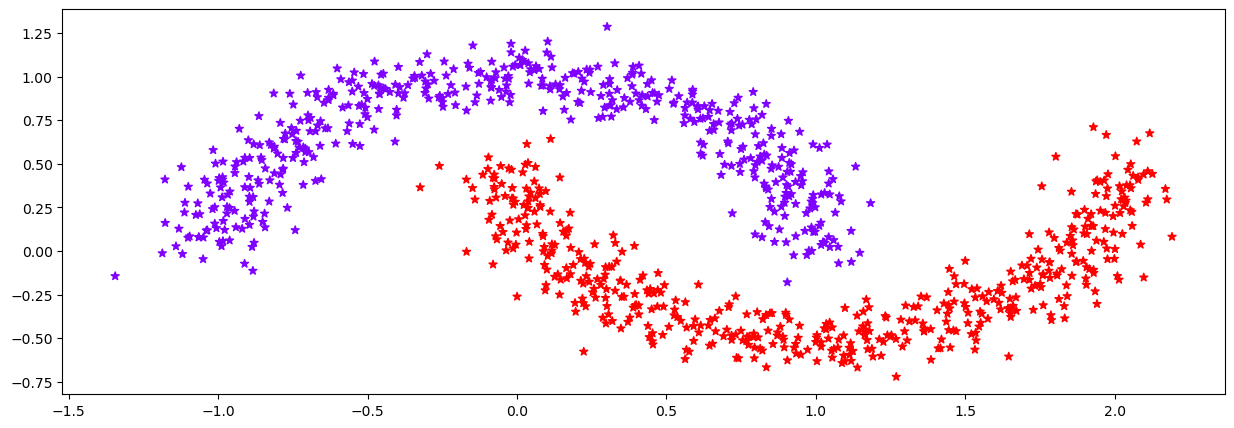

In [127]:
plt.scatter(X[:,0], X[:,1], c=y , marker='*', cmap=CMAP)

In [130]:
clf = BernoulliNB() #Instantiation

clf.fit(X, y) # fit the model
y_pred = clf.predict(X) #predictions
accuracy_score(y, y_pred)

0.825